# **COVID-19 And Its Impact On Education, Eocial Life and Mental Health Of Students**
**In this study, a cross-sectional survey is conducted with a sample size of 1182 students of different age groups from different educational institutions in Delhi National Capital Region (NCR).**

# **Section A : Analysis**

## Import libraries & dataset.

In [3]:
%%time
import pandas as pd
import numpy as np
import warnings

pd.options.display.max_columns = 200
pd.options.display.max_rows = 200
warnings.filterwarnings('ignore')

CPU times: user 105 µs, sys: 29 µs, total: 134 µs
Wall time: 142 µs


In [4]:
survey_df = pd.read_csv('COVID-19 Survey Student Responses.csv')
survey_df

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2,3,Decreased,NO,Dancing,YES,YES,Travelling
1178,R1192,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,Whatsapp,1,4,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives"
1179,R1193,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2,4,Decreased,NO,Online gaming,NO,YES,School/college
1180,R1194,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1,4,Remain Constant,NO,Reading books,YES,YES,School/college


In [5]:
survey_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

### Note :
1. First of all renaming the columns as per my convenience.
2. There is missing data in columns such as __Rating of Online Class experience__ and __Medium for online class__.
3. Rest columns are okay.
4. Many columns are treated as object that we need to deal also. 

## Data preparation & data cleaning.

In [6]:
survey_df.rename(
    columns = {
        'Region of residence': 'region',
        'Age of Subject': 'age',
        'Time spent on Online Class': 'time_online_class',
        'Rating of Online Class experience': 'rating_online_class',
        'Medium for online class': 'medium',
        'Time spent on self study': 'time_self_study',
        'Time spent on fitness': 'time_fitness',
        'Time spent on sleep': 'time_sleep',
        'Time spent on social media': 'time_social_media',
        'Prefered social media platform': 'prefered_social_media',
        'Time spent on TV': 'time_tv',
        'Number of meals per day': 'num_meals_per_day',
        'Change in your weight': 'delta_weight',
        'Health issue during lockdown': 'health_issue_in_lockdown',
        'Stress busters': 'stress_busters',       
        'Time utilized': 'time_utilized',
        'Do you find yourself more connected with your family, close friends , relatives  ?': 'more_family_connected',
        'What you miss the most': 'miss_most'}, inplace = True)

del survey_df['ID']  # Deleting ID column since it is not useful.

survey_df.head()

,region,age,time_online_class,rating_online_class,medium,time_self_study,time_fitness,time_sleep,time_social_media,prefered_social_media,time_tv,num_meals_per_day,delta_weight,health_issue_in_lockdown,stress_busters,time_utilized,more_family_connected,miss_most
0,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [7]:
survey_df.describe()

,age,time_online_class,time_self_study,time_fitness,time_sleep,time_social_media,num_meals_per_day
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,20.165821,3.208841,2.911591,0.765821,7.871235,2.365694,2.917936
std,5.516467,2.101756,2.140590,0.724451,1.615762,1.767336,0.828698
min,7.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000
25%,17.000000,2.000000,2.000000,0.000000,7.000000,1.000000,2.000000
50%,20.000000,3.000000,2.000000,1.000000,8.000000,2.000000,3.000000
75%,21.000000,5.000000,4.000000,1.000000,9.000000,3.000000,3.000000
max,59.000000,10.000000,18.000000,5.000000,15.000000,10.000000,8.000000


### Note :
1. People from age 7 to uptill 59 are studying online during covid-19 situation.
2. Average time spend on the online classes is 3 hours ~ 3 & a half.(we can say)
3. Average time given to self study : 2.9 hours ~ almost 3 hours.
4. Average time given to fitness/health : 1 hour.
5. Average time spend on social media : 2.36 hours.
6. Average meal people are getting : nearly 3 time/day. 

In [8]:
print(survey_df['rating_online_class'].unique())

['Good' 'Excellent' 'Very poor' 'Average' nan 'Poor']


In [9]:
print(survey_df['medium'].unique())

['Laptop/Desktop' 'Smartphone' 'Tablet' nan 'Any Gadget'
 'Smartphone or Laptop/Desktop']


In [10]:
survey_df[['rating_online_class', 'medium']].isnull().sum()

rating_online_class    24
medium                 51
dtype: int64

In [11]:
%%time
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent').fit(survey_df[['rating_online_class', 'medium']])
survey_df[['rating_online_class', 'medium']] = imputer.transform(survey_df[['rating_online_class', 'medium']])
survey_df[['rating_online_class', 'medium']].isnull().sum()

CPU times: user 166 ms, sys: 62 ms, total: 228 ms
Wall time: 315 ms


rating_online_class    0
medium                 0
dtype: int64

In [12]:
survey_df['prefered_social_media'].value_counts()

prefered_social_media
Instagram    352
Whatsapp     336
Youtube      314
Linkedin      61
Facebook      52
Twitter       28
Snapchat       8
Reddit         5
Telegram       3
Omegle         1
Elyment        1
None           1
Quora          1
Talklife       1
WhatsApp       1
Name: count, dtype: int64

In [13]:
survey_df['prefered_social_media'].unique()

array(['Linkedin', 'Youtube', 'Instagram', 'Whatsapp', nan, 'Reddit',
       'Snapchat', 'Omegle', 'Twitter', 'Telegram', 'Facebook', 'Elyment',
       'None ', 'Quora', 'Talklife', 'WhatsApp'], dtype=object)

In [14]:
survey_df['prefered_social_media'].replace('None ', 'None', inplace = True)
survey_df['prefered_social_media'].replace('Whatsapp', 'WhatsApp', inplace = True)
survey_df['prefered_social_media'].value_counts()

prefered_social_media
Instagram    352
WhatsApp     337
Youtube      314
Linkedin      61
Facebook      52
Twitter       28
Snapchat       8
Reddit         5
Telegram       3
Omegle         1
Elyment        1
None           1
Quora          1
Talklife       1
Name: count, dtype: int64

In [15]:
survey_df['time_tv'].unique()

array(['1', '0', '3', '0.5', 'n', '2', '4.5', '1.5', 'N', '4', '0.3', '5',
       'No tv', '0.1', '0.25', '6', '0.6', '7', '8', '15', ' ', '0.75',
       '2.5', '3.5', '0.4'], dtype=object)

### Note 
1. In here we can see many different responses.<br>
2. We would replace anything like 'n', 'N, 'no', empty etc. with __0__<br>
3. We would also change the datatype for this column to be __float__ instead of objec2. 

In [16]:
survey_df['time_tv'].replace({'n':'0', 'N':'0', 'No tv':'0', ' ':'0', 0:'0'}, inplace = True)
survey_df['time_tv'] = survey_df['time_tv'].astype('float', copy = True)

In [17]:
survey_df['stress_busters'].unique()

array(['Cooking', 'Scrolling through social media', 'Listening to music',
       'Watching web series', 'Social Media',
       'Coding and studying for exams', 'Online surfing',
       'live stream watching', 'Reading', 'Online gaming',
       'Reading books', 'Dancing', 'Talking with friends ',
       'Talking to your relatives',
       'sketching,reading books,meditation,songs',
       'Watching orgasm releasing videos', 'Sleep', 'Crying',
       'Many of these', 'Web Series', 'drawing ', 'Meditation', 'Cricket',
       'Anime Manga', 'Sleeping', 'Sketching and writing', 'Writing',
       'pubg', 'Talking', 'Workout ', 'Whatever want', 'Indoor Games',
       'watching movies,reading books,games,listening to music,sleep,dancing',
       'gardening cartoon',
       'listening to music,reading books and dancing.',
       'Dont get distreessed',
       ' listening music, motion design, graphic design, sleeping.',
       'Business', 'Many among these ', 'Talk with childhood friends.',
   

In [18]:
survey_df['stress_busters'].replace([
    ['Sleep'],
    ['Scrolling through social media'],
    ['Reading books'],
    ['Talking to your relatives']
], ['Sleeping', 'Social Media', 'Reading', 'Talking'], inplace = True)

In [19]:
survey_df['stress_busters'].replace([
    'Exercising','Exercise','Gym','Workout ','Cardio',
    'workout','working out and some physical activity'
],'Exercise/Gym', inplace = True)

In [20]:
survey_df['stress_busters'].replace([
    'Talking with friends ','Talking','Talking to friends','With a friend',
    'Calling friends','Taking with parents','Talk with childhood friends.',
], 'Talking', inplace = True)

In [21]:
survey_df['stress_busters'].replace([
    'Listening to music',' listening music, motion design, graphic design, sleeping.',
    'singing','Workout and listening music',
    'Both listining music and scrolling down social media',
    'Listening to music and reading books both . ',
    'Poetry, writing books and novels , listening to music too'
], 'Music', inplace = True)

In [22]:
survey_df['stress_busters'].replace([
    'Online surfing','live stream watching','Watching orgasm releasing videos','Anime Manga',
    'Watching ted talks and music and books','Watching YouTube ','Internet',
    'Online gaming , surfing and listening to music ','Web Series','Watching web series',
    'Netflix, Friends and Books','Youtube'
], 'Internet Surfing', inplace=True)

In [23]:
survey_df['stress_busters'].replace([
    'Coding and studying for exams',
    'sketching,reading books,meditation,songs',
    'Many of these',
    'All reading books watching web series listening to music and talking to friends',
    'Many among these ',
    'Do some home related stuff',
    'watching movies,reading books,games,listening to music,sleep,dancing',
    'Reading books, music, exercise',
    'Whatever want','listening to music,reading books and dancing.',
], 'Many Things', inplace=True)

In [24]:
survey_df['stress_busters'].replace([
    'Reading','drawing','Dancing','Meditation','Driving','Drawing, painting','Forming ','Painting','Sketching',
    'Sports','Painting ','Drawing','Football','Business','Running','I run','Drawing and painting and sketching',
    'I play Rubiks cube','Indoor Games','I cant de-stress myslef','Writing my own Comics & novels',
    'I have no problem of stress ','Sketching and writing','By engaging in my work.', 'Work',
    'Painting,. Sewing','Crying','Dont get distreessed','gardening cartoon','Playing ','no stress',
    'Cricket','No able to reduce the stress ','drawing ','Writing'
], 'Doing Extra Activities', inplace=True)

In [25]:
survey_df['stress_busters'].replace([
    'Sleeping, Online games',
    'pubg'
], 'Online gaming', inplace=True)

In [26]:
print(survey_df['stress_busters'].unique())

['Cooking' 'Social Media' 'Music' 'Internet Surfing' 'Many Things'
 'Doing Extra Activities' 'Online gaming' 'Talking' 'Sleeping'
 'Exercise/Gym']


In [27]:
print(survey_df['stress_busters'].value_counts())

stress_busters
Music                     282
Doing Extra Activities    209
Internet Surfing          183
Online gaming             177
Sleeping                  105
Social Media              100
Talking                    62
Cooking                    41
Exercise/Gym               13
Many Things                10
Name: count, dtype: int64


In [28]:
survey_df['miss_most'].unique()

array(['School/college', 'Roaming around freely', 'Travelling',
       'Friends , relatives', 'Eating outside', 'Colleagues', 'Job',
       'Nothing this is my usual life', 'Gym', 'All of them',
       'Friends and School', 'Friends,Romaing and traveling',
       'Only friends', 'Taking kids to park', 'All of the above ',
       'All the above', 'Internet', 'Going to the movies', 'Nothing',
       'school, relatives and friends', 'All ', 'All', 'all of the above',
       'Nothing ', 'Eating outside and friends.', 'All above',
       'Nah, this is my usual lifestyle anyway, just being lazy....',
       'Family ', 'Football', 'Normal life',
       'The idea of being around fun loving people but this time has certainly made us all to reconnect (and fill the gap if any) with our families and relatives so it is fun but certainly we do miss hanging out with friends',
       'My normal routine', 'ALL', 'NOTHING', 'Being social ',
       'Previous mistakes', 'all', 'nothing', 'Playing', '.',
 

In [29]:
survey_df['miss_most'].replace(
    [
        'All the above',
        'All of the above ',
        'everything',
        'All above',
        'all of the above',
        'ALL','all',
        'All of the above',
        'all of them',
        'All of them',
        'All '
    ],
    'All', inplace=True)

In [30]:
survey_df['miss_most'].replace(
    [
        'NOTHING',
        'Nothing this is my usual life',
        'To stay alone. ',
        'Nothing ',
        'Nah, this is my usual lifestyle anyway, just being lazy....',
        'Normal life',
        'My normal routine',
        'nothing',
        'Job',
        'I have missed nothing',
        'Previous mistakes',
        '.',
        'I have missed nothing ',
        'Internet'
    ],
    'Nothing', inplace=True)

In [31]:
survey_df['miss_most'].replace(
    [
        'Only friends',
        'Friends , relatives',
        'relatives and friends',
        'Family ',
        'The idea of being around fun loving people but this time has certainly made us all to reconnect (and fill the gap if any) with our families and relatives so it is fun but certainly we do miss hanging out with friends',
        'Family',
        'Friends, relatives & travelling',
        'Travelling & Friends',
        'School and friends',
        'Friends and School',
        'Eating outside and friends.',
        'School and friends.',
        'school, relatives and friends',
        'School and my school friends'
    ],
    'Friends/Relatives/Family', inplace=True)

In [32]:
survey_df['miss_most'].replace(
    [
        'Playing',
        'Roaming around freely',
        'Taking kids to park',
        'Being social ',
        'Friends and roaming around freely',
        'Friends,Romaing and traveling',
        'Metro',
        'Going to the movies',
        'Gym',
        'Football',
        'Badminton in court'
    ],
    'Passing Time Outside', inplace=True)

In [33]:
survey_df['miss_most'].unique()

array(['School/college', 'Passing Time Outside', 'Travelling',
       'Friends/Relatives/Family', 'Eating outside', 'Colleagues',
       'Nothing', 'All'], dtype=object)

In [34]:
survey_df['miss_most'].value_counts()

miss_most
School/college              379
Friends/Relatives/Family    235
Travelling                  183
Passing Time Outside        162
Eating outside              104
Colleagues                   67
Nothing                      26
All                          26
Name: count, dtype: int64

In [35]:
survey_df.head()

,region,age,time_online_class,rating_online_class,medium,time_self_study,time_fitness,time_sleep,time_social_media,prefered_social_media,time_tv,num_meals_per_day,delta_weight,health_issue_in_lockdown,stress_busters,time_utilized,more_family_connected,miss_most
0,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1.0,4,Increased,NO,Cooking,YES,YES,School/college
1,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0.0,3,Decreased,NO,Social Media,YES,NO,Passing Time Outside
2,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0.0,3,Remain Constant,NO,Music,NO,YES,Travelling
3,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0.0,3,Decreased,NO,Internet Surfing,NO,NO,Friends/Relatives/Family
4,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1.0,4,Remain Constant,NO,Social Media,NO,NO,Travelling


**Data is much ``cleaner`` now.**

## Exploratory Analysis & Visualizations.📚

- We will explore every aspect of our dataset.
- We will gather some information which we will visualise to make some conclusion
- We will Also do some basic mathematics to infer some insights related to dataset
- Then we will also visualise and compare anything we might found to be interesting

In [37]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [38]:
survey_df.age.describe()

count    1182.000000
mean       20.165821
std         5.516467
min         7.000000
25%        17.000000
50%        20.000000
75%        21.000000
max        59.000000
Name: age, dtype: float64

In [39]:
fig = px.histogram(survey_df, x = 'age', marginal = 'box',
                   width = 900, height = 580, color_discrete_sequence=['plum'],)
fig.update_layout(title = 'Age distribution',
                  xaxis_title = 'Age groups',
                  yaxis_title = 'Number of students',
                  font = dict(family = 'Arial', size = 15),
                  bargap = 0.1)
fig.show();

#### Conclusion:
- We Can immediately see that most of the students answered the survey fall in the category of 15-25
- This is the age group where most students are self-aware and able to answer these questions
- Also we can see that Highest number of students are 20 years old, so maybe they are in college and universities and we might get something interesting as covid-19 actually hampered their studies
- There are even students from age __40 to 59__.


### Class Ratings :

In [40]:
print(survey_df['rating_online_class'].unique())

['Good' 'Excellent' 'Very poor' 'Average' 'Poor']


In [41]:
survey_df['rating_online_class'].value_counts()

rating_online_class
Very poor    437
Average      387
Good         230
Excellent     98
Poor          30
Name: count, dtype: int64

In [42]:
fig = px.histogram(survey_df, x = survey_df['rating_online_class'], color = 'rating_online_class',
            width=900, height = 580)

fig.update_layout(title = 'Ratings for online class',
                 xaxis_title = 'Ratings',
                 yaxis_title = 'No. of students',
                 font = dict(family = 'Droid Serif', size = 15))
fig.show()

### Insights :
- We have exactly 437 students who states that the class is being held is ``very poor``.
- Below that we have 387 students who states that the class is ``Average``.
- 30 students says its ``poor``.
- Apart from this 230 students & 98 student says their class is ``good`` and ``excellent`` repectively.



- We can infer that there is a large number of students who are not enjoying online classes scenario.
- So we can Confidently say that Online classes are not as good as actual classes because Students need some kind of environment to excel in studeies which online classes fail to provide

In [43]:
#total students - rating wise count
1182-437-387-230-98-30

0

### Time spent on study :

In [44]:
fig = px.histogram(survey_df, x = 'time_self_study', 
                   color_discrete_sequence=['darkorange'],
                   width=900, height = 550)

fig.update_layout(title = 'Time spent on selft study',
                 xaxis_title = 'Hours',
                 yaxis_title = 'Number of students',
                 font = dict(family = 'Balto', size = 13))
fig.show()

### Insights :
- Around 1 ot 3 hours students averagly spend on their studies.
- We have 346 students who spends 2 hours on their studies. These are must be self aware students of the university/college.
- There are students who spends more than 5/7 hours on studies.
- There are 15 students who spends 10 hours on self studies. 5 students spends 12 hours.
- Lastly we see there are two students who spends 17, 18 hours on self studies respectively.


## Popular social media platforms :

In [45]:
fig = px.histogram(survey_df, y = survey_df['prefered_social_media'],
                   color = 'prefered_social_media', width = 900, height = 570)

fig.update_layout(title = 'Prefered Social Medias',
                  xaxis_title = 'Total users', 
                  yaxis_title = 'Social medias',
                  font = dict(
                      family = 'Balto', size = 15))
fig.show()

### Note :
- We can see there are total 14 social media platforms are popular among students.
- We will choose the top 5 - the most used platforms by students.
- that would be easy for analysis.

In [46]:
top5_social = survey_df['prefered_social_media'].value_counts().nlargest(5)
top5_social

prefered_social_media
Instagram    352
WhatsApp     337
Youtube      314
Linkedin      61
Facebook      52
Name: count, dtype: int64

In [50]:
import plotly.express as px

pact = top5_social * 100
pact /= top5_social.sum()

# Create a DataFrame with 'pact' and 'Social Medias' as columns
data = pd.DataFrame({'pact': pact, 'Social Medias': top5_social.index})

fig = px.histogram(data, x='pact', y='Social Medias', width=900, height=550, color='Social Medias')
fig.update_layout(
    title='Top 5 social media platforms among students',
    xaxis_title='Percentage',
    yaxis_title='Social Medias',
    font=dict(family='Droid Serif', size=15)
)
fig.show()


### Insights : 
- As we obsereved earlier, more than ``31 %`` students prefer using __Instagram__ as it provides a source of entertainment at fingertips and only a few swipes and you are loaded with ton of dopamine in the time of lockdown
- Also Usage of __WhatsApp__ is also about ``30 %`` as this platform helps them to connect with friends and family easily, moreover during the Lockdown most schools are providing material and other important notices through WhatsApp so this might be one of the reasons that this is so popular
- Now __YouTube__ is 3rd in the list, although it is not considered a well-defined social media but many students are sharing thier artworks, insights, achievement through this platform, Also YouTube has become the largest learing community in the world as every bit of knowledge is present there

### Time spend on social media by students:

In [51]:
fig = px.scatter(survey_df, x = 'age', y = 'time_social_media', size = 'time_social_media', color='prefered_social_media')
fig.update_layout(title = 'Time spend on social medias',
                 xaxis_title = 'students of age',
                 yaxis_title = 'Time spent',
                 font = dict(family = 'Droid Serif', size = 14))
fig.show()

### Insights :
- Age group from __12 to 25__ seems to be spending a lot of time on social media during covid-19.
- There are people who actually spends __10 hours__ on social medias.
- 10 hours is the most highest time/duration spend on social media, among youngsters.
- Even there are people of age 27 to 34 spending time 7 to 8 hours on these medias, these are must be _unemployed._ 

### Time spent of self study :

In [52]:
fig = px.scatter(survey_df, x = 'age', y = 'time_self_study', size = 'time_self_study', color='time_self_study')
fig.update_layout(title = 'Time spend slef study',
                 xaxis_title = 'students of age',
                 yaxis_title = 'Time spent',
                 font = dict(family = 'Droid Serif', size = 14))
fig.show()

### Insights :
- Average time spent on studies is __2-3__ hours.
- Students uder age of __15 to 25/27__ spends most time on their studies.
- Heighest time spent on the self studies is 17-18 hours, by some of these students(not all).
- Even people of age __30 to 40__ spends __4 to 5__ hours on self studies.

 ###  Do students find themselves MORE Connected with their Family/Close Frinds  ?

In [53]:
import plotly.graph_objects as go
from plotly import tools

labels, values = survey_df['more_family_connected'].unique(), survey_df['more_family_connected'].value_counts()

fig = go.Figure(data=[go.Pie(labels = labels, values = values, pull=[0.1])])
fig.update_layout(title = 'Do You Feel more Connected to Family/Close Friends ?',
                 font = dict(family = 'Droid Serif', size = 15))
fig.show()

### Insights :
- 70.3% people says __YES__, they do feel connected with the family/friends.
- 29.7 almost 30% are not satisfied, their answer is __NO__.

### It would be interesting to know how many students think they utilize their time

In [54]:
labels, values = survey_df['time_utilized'].unique(), survey_df['time_utilized'].value_counts()


fig = go.Figure(data = [go.Pie(labels = labels, values = values.sort_values(), hole = .3)])
fig.update_layout(title = 'Time Utilize',
                 font = dict(family = 'Droid Serif', size = 15))
fig.show()

#### Conclusion:
- Here it is quite bizzare that the data is divided almost equally even though a pandemic is goin on
- It is a good thing that close to 50 % students think that they are utilising their time
- But let's not jump to conclusion and figure out how does students spend their time

### What students are missing most during covid-19 :

In [55]:
print(survey_df['miss_most'].unique())

['School/college' 'Passing Time Outside' 'Travelling'
 'Friends/Relatives/Family' 'Eating outside' 'Colleagues' 'Nothing' 'All']


In [57]:
import plotly.express as px

# Calculate the percentages and create a DataFrame
pct = survey_df['miss_most'].value_counts() * 100 / len(survey_df)
pct = pct.reset_index()
pct.columns = ['Features', 'Percentage']

fig = px.histogram(pct, x='Percentage', y='Features', color='Features',
                  width=900, height=570)
fig.update_layout(title='What students are missing during covid-19',
                 xaxis_title='Percentage',
                 yaxis_title='Features',
                 font=dict(family='Droid Serif', size=15))
fig.show()


#### Insights :
- So the 32% of the overall data, students are missing their schools & colleges, which is quiet obvious.
- Then 19% students are missing their Friends and family or relatives.
- There are 13-15% students who are missing eating outside or Passing time outside we can say in a straight manner.
- 5.6% students miss their colleagues.
- Lastly we see 2.19% students who claims they are missing Nothing.
- Same percentile of students who claims they are missing All.

### Effects of pandemic on student's weights :

In [58]:
print(survey_df['delta_weight'].unique())

['Increased' 'Decreased' 'Remain Constant']


In [59]:
survey_df['delta_weight'].value_counts()

delta_weight
Remain Constant    535
Increased          438
Decreased          209
Name: count, dtype: int64

In [60]:
labels, values = ['Remain Constant','Increased','Decreased'], survey_df['delta_weight'].value_counts()
fig = go.Figure(data=[go.Pie(labels =  labels, values = values, hole=.3)])
fig.update_layout(title = 'Effects on weights of students',
                 font = dict(family = 'Droid Serif', size = 14))
fig.show()

### Insights :
- 45.3% students claims there is no gain in their weight during lockdown/covid-19.
- 37.1% students claims they do have gained weight.
- 17.7% says they have lost their weight.

### Student's favourite stress busters :

In [61]:
print(survey_df['stress_busters'].unique())

['Cooking' 'Social Media' 'Music' 'Internet Surfing' 'Many Things'
 'Doing Extra Activities' 'Online gaming' 'Talking' 'Sleeping'
 'Exercise/Gym']


In [63]:
import plotly.express as px

labels = survey_df['stress_busters'].value_counts().reset_index()
labels.columns = ['Features', 'Count']

fig = px.histogram(labels, x='Count', y='Features', color='Features',
                   width=900, height=570)

fig.update_layout(title='Stress busters of students',
                  xaxis_title='Count',
                  yaxis_title='Features',
                  font=dict(family='Droid Serif', size=15))
fig.show()


### Insights :
- As we all know that Music heals our body, mind, soul and spirit, so it is quite expected that most students rely on Music to overcome their stress.
- Now during these times many students too over some hobbies which are represented by 'Doing Extra Activities' which helped them to overcome stress such as drawing, writing, sketching etc. that is why it may be second on the list
- Also Internet Surfing is third on list which suggests that their are many students who surf the internet and look for more information and entertainment sources to bust their stress
- During the pandemic many kind of Online games have gained popularity like PUBG, Among Us, Getting Over It etc. So it is clear that many students used these Online games to lower down their stress levels.

# **Section B : Model** 

### <span style='color:#FFA07A'> 1.1 Import Libraries </span>

In [65]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")


### <span style='color:#FFA07A'> 1.2 Import Data Source </span>

In [66]:
data = pd.read_csv('COVID-19 Survey Student Responses.csv')
data.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


### <span style='color:#FFA07A'> 2. Data Cleaning </span>

In [67]:
#Check the dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

#### <span style='color:#FFA07A'> 2.1 Remove features that are less relevant </span>

The data set contains multiple data types, including string, integer, and floating-point. Since this analysis aims to discover a correlation between variables and the rating of online class experience, we'll emphasize exploring the relationship within objective variables. Subjective-defined columns that are inclined to psychological factors will be removed.

In [68]:
data_v2 = data.drop(columns=['Stress busters', 'Time utilized', 'Do you find yourself more connected with your family, close friends , relatives  ?', 'What you miss the most'])
data_v2.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO


#### <span style='color:#FFA07A'> 2.2 Check missing values </span>

In [69]:
data_v2.isnull().sum().sort_values(ascending=False)/len(data_v2)

Medium for online class              0.043147
Rating of Online Class experience    0.020305
Prefered social media platform       0.014382
ID                                   0.000000
Region of residence                  0.000000
Age of Subject                       0.000000
Time spent on Online Class           0.000000
Time spent on self study             0.000000
Time spent on fitness                0.000000
Time spent on sleep                  0.000000
Time spent on social media           0.000000
Time spent on TV                     0.000000
Number of meals per day              0.000000
Change in your weight                0.000000
Health issue during lockdown         0.000000
dtype: float64

📌 Points to know:

It seems there're only a few missing values in columns 'Medium for online class' and 'Rating of Online Class Experience.' It could result from these reasons:
- Some students don't have access to online class
- Ratings can't be made due to the lack of access



#### <span style='color:#FFA07A'> 2.3 Remove incomplete rows </span>

By exploring the data set, we find the 'NA' value exists in the column 'Medium for online class.' Since the ambiguous data can't provide adequate information to evaluate the correlation, we'll drop the rows containing the 'NA' value.

In [70]:
#Transform the dataframe into pandas dataframe
df = pd.DataFrame(data_v2)

#Define in which column to look for missing values
df_2 = df.dropna(subset=['Medium for online class'])

#Print the count of missing values
missing_val = df['ID'].count() - df_2['ID'].count()
print("There are", missing_val, "'NA' values")

There are 51 'NA' values


#### <span style='color:#FFA07A'> 2.4 Convert String to Integer </span>

To better serve the objective of the analysis, we're going to create a new column that converts the string column 'Rating of Online Class experience' to a numeric column. A numeric scale from 1 to 5 will define the rating from "Very poor" to "Excellent." 

In [71]:
#Create a new column 'Numeric Rating'
df_2.loc[df_2['Rating of Online Class experience'] == 'Very poor', 'Numeric Rating'] = '1'
df_2.loc[df_2['Rating of Online Class experience'] == 'Poor', 'Numeric Rating'] = '2'
df_2.loc[df_2['Rating of Online Class experience'] == 'Average', 'Numeric Rating'] = '3'
df_2.loc[df_2['Rating of Online Class experience'] == 'Good', 'Numeric Rating'] = '4'
df_2.loc[df_2['Rating of Online Class experience'] == 'Excellent', 'Numeric Rating'] = '5'

#Convert string to integer
pd.to_numeric(df_2['Numeric Rating'])

0       4
1       5
2       1
3       1
4       4
       ..
1177    4
1178    3
1179    3
1180    5
1181    4
Name: Numeric Rating, Length: 1131, dtype: int64

Besides, we're going to transform the other two columns into numeric columns to explore the correlation.

In [72]:
#Create a list of conditions for column 'Change in your weight'
conditions = [
    (df_2['Change in your weight'] == 'Increased'),
    (df_2['Change in your weight'] == 'Decreased'),
    (df_2['Change in your weight'] == 'Remain Constant')
]

#Create a list of values we want to assign for each condition
values = ['1', '-1', '0']

#Create a new column and use np.select to assign values to it
df_2['Numeric Change in Weight'] = np.select(conditions, values)

#Convert string to integer
pd.to_numeric(df_2['Numeric Change in Weight'])

0       1
1      -1
2       0
3      -1
4       0
       ..
1177   -1
1178    0
1179   -1
1180    0
1181    0
Name: Numeric Change in Weight, Length: 1131, dtype: int64

In [73]:
#Create a new column 'Health Issue (1 or 0)'
#If the answer for column 'Health issue during lockdown' is YES, then assign the value of 1
#Otherwise, if the answer is NO, then assign the value of 0

df_2['Health Issue (1 or 0)'] = df_2['Health issue during lockdown'].apply(lambda x: 1 if x == 'YES' else 0)
print(df_2['Health Issue (1 or 0)'])

0       0
1       0
2       0
3       0
4       0
       ..
1177    0
1178    0
1179    0
1180    0
1181    0
Name: Health Issue (1 or 0), Length: 1131, dtype: int64


### <span style='color:#FFA07A'> 3.1 Identify Medium for Online Class </span>

Before identifying a medium for the online class, separating students into groups based on whether they can employ the medium is significant. By doing this, we can derive how much impact the access to medium can make on students' experience. Furthermore, we'll categorize the types of the medium into sub-groups and assess their individual effects.

#### <span style='color:#FFA07A'> 3.1.1 Create a countplot for students without access </span>

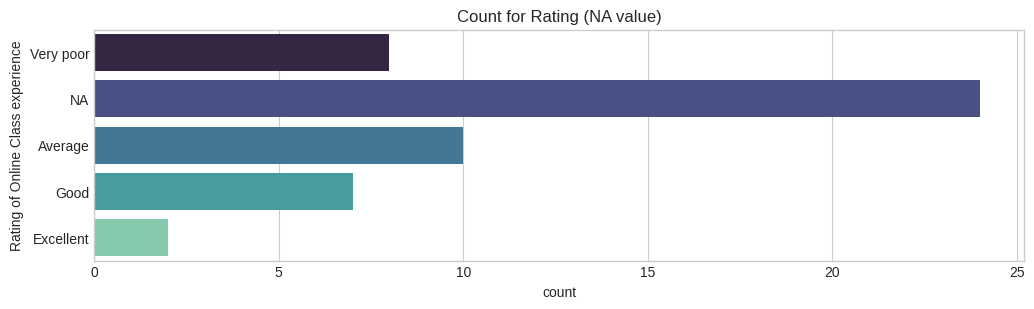

In [74]:
#Extract all rows with 'NA' value from column 'Medium for online class'
df_na = df[df['Medium for online class'].isna()]

#Create a countplot 
plt.figure(figsize=(12,3))
fig1 = sns.countplot(y = 'Rating of Online Class experience', data = df_na.fillna('NA'), palette='mako')
fig1.set_title("Count for Rating (NA value)")
plt.show()

📌 Points to know:

- Here shows that the "NA" value covers almost half the proportion in the data representing students without access.
- Values "Very Poor" and "Average" are composed of the second and third largest percentage in the plot.
- Combining the count plot and the two observations above, the shortage of medium to online classes is likely to affect students' experience negatively.

#### <span style='color:#FFA07A'> 3.1.2 Create a countplot for students with access </span>

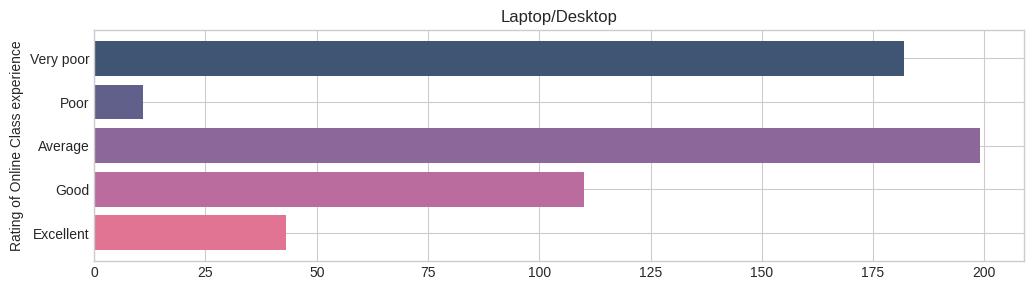

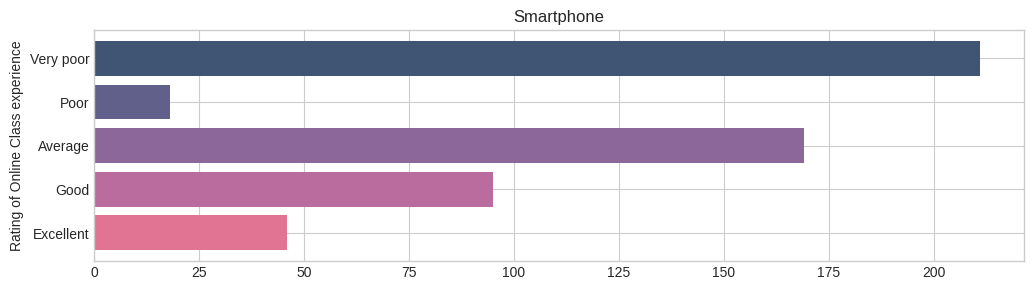

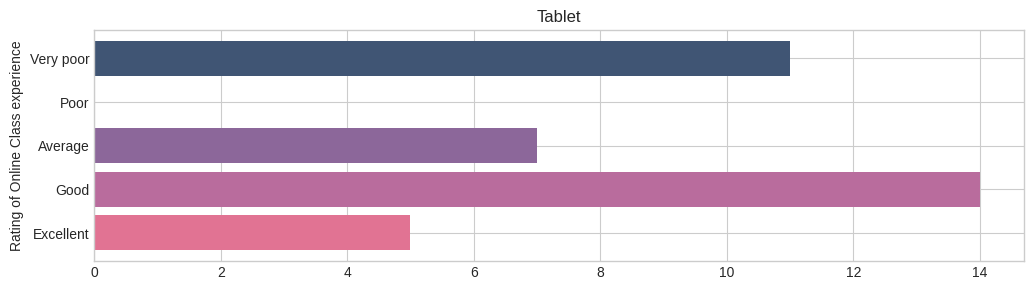

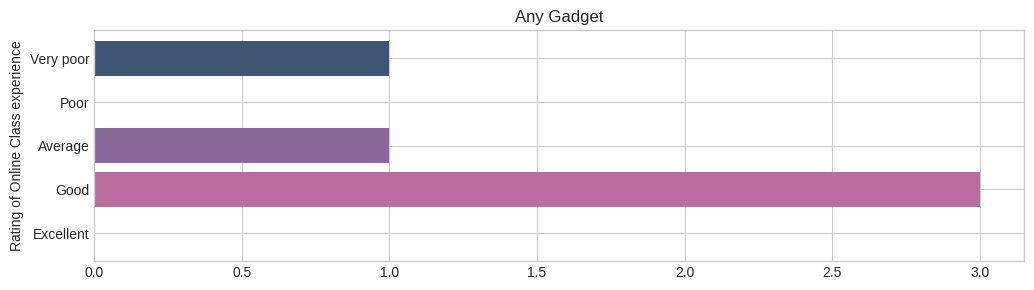

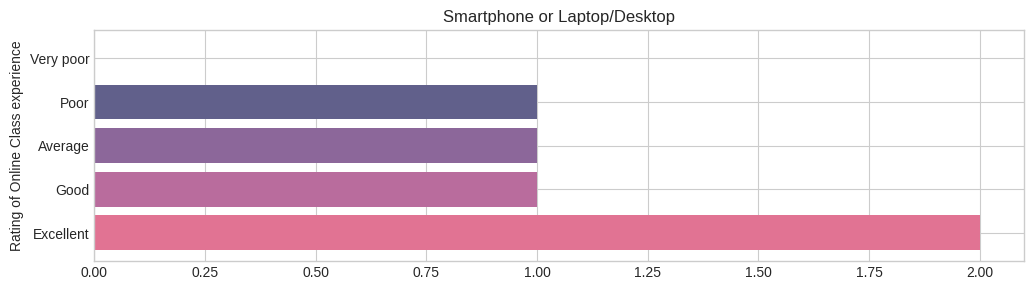

In [75]:
#Define a list that contains all the medium types
medium = df_2['Medium for online class'].unique()  

#Define a list that contains all the ratings
rating_index = ['Excellent','Good','Average','Poor','Very poor']

#Create a color palette
palette = ['#E17393', '#B96C9D', '#8C679A', '#61608B', '#405574']

#Create a loop that iterates each medium type
for type in medium:
    ax=df_2.loc[(df_2['Medium for online class']== type)].groupby(by='Rating of Online Class experience').ID.count()
    ax.reindex(rating_index).plot.barh(title=type, width=0.8, color=palette, figsize=(12,3))
    plt.show()

📌 Points to know:

The graphs show that the smartphone and laptop/desktop are the two most common medium types students acquire for the online class. However, students that use smartphone or laptop/desktop alternatively are much less.
- Being the major medium types, smartphone and laptop/desktop display a broad coverage in ratings "Very Poor" and "Average." 
- Meanwhile, the ratings "Poor" and "Excellent" cover a small proportion.
- In other words, we can assume that the most frequently used medium might not provide the best students' online class experience.

### <span style='color:#FFA07A'> 3.2 Correlation with Personal Indicators </span>

I'll explore if there's a correlation between each variable from personal indicators and the rating of students' online class experience.

#### <span style='color:#FFA07A'> 3.2.1 Region of residence </span>

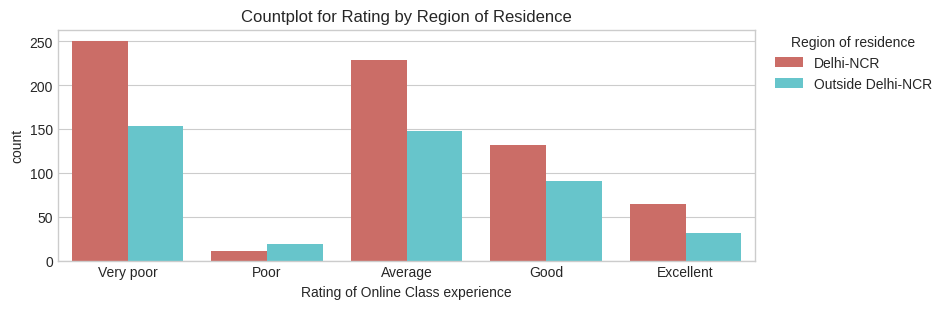

In [76]:
plt.figure(figsize = (9, 3))
fig2 = sns.countplot(x="Rating of Online Class experience", 
                     order=['Very poor', 'Poor', 'Average', 'Good', 'Excellent'],
                     hue="Region of residence", data=df_2, palette='hls')
fig2.set_title('Countplot for Rating by Region of Residence')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Region of residence', borderaxespad=0)

📌 Points to know:

Delhi region has more counts in all columns than outside-Dehli region except the column "Poor." It implies two points:
- Students in Delhi region gain more access to the online class.
- More populations cluster in Delhi region than outside-Delhi region.

#### <span style='color:#FFA07A'> 3.2.2 Age of Subject </span>

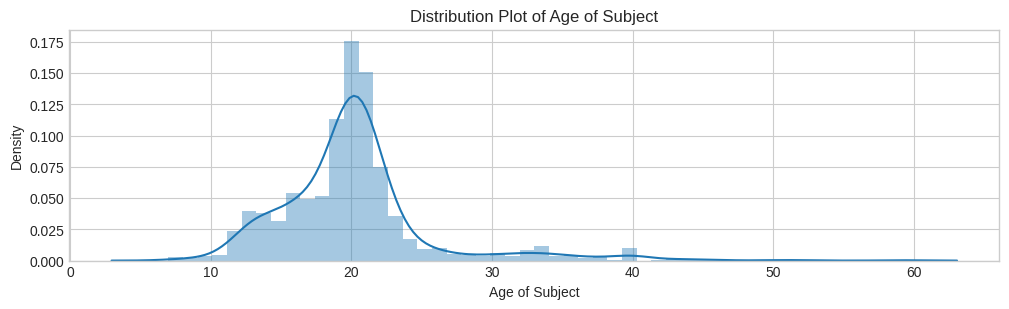

In [77]:
plt.figure(figsize = (12, 3))
sns.distplot(df_2['Age of Subject'])
plt.title('Distribution Plot of Age of Subject')
plt.show()

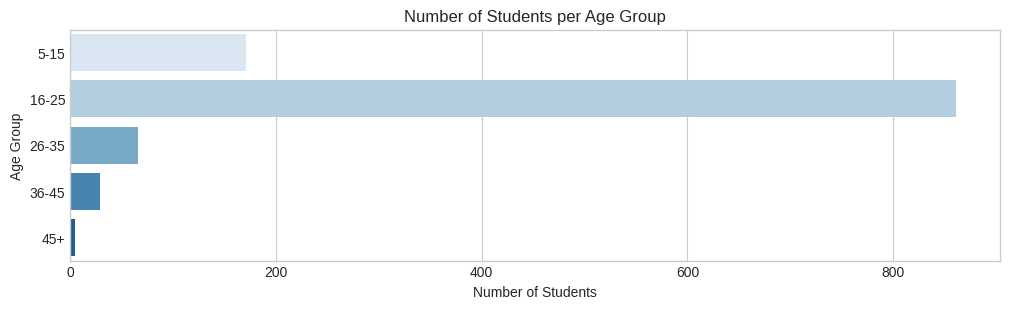

In [78]:
#Create age groups to classify subjects
age_5_15 = df_2.loc[(df_2['Age of Subject'] >= 5) & (df_2['Age of Subject'] <= 15)]
age_16_25 = df_2.loc[(df_2['Age of Subject'] >= 16) & (df_2['Age of Subject'] <= 25)]
age_26_35 = df_2.loc[(df_2['Age of Subject'] >= 26) & (df_2['Age of Subject'] <= 35)]
age_36_45 = df_2.loc[(df_2['Age of Subject'] >= 36) & (df_2['Age of Subject'] <= 45)]
age_45above = df_2.loc[(df_2['Age of Subject'] >= 45)]

#Define x-axis and y-axis
age_x = ['5-15', '16-25', '26-35', '36-45', '45+']
age_y = [len(age_5_15), len(age_16_25), len(age_26_35), len(age_36_45), len(age_45above)]

#Create a barplot
plt.figure(figsize=(12,3))
fig3 = sns.barplot(x=age_y, y=age_x, data=df_2, palette='Blues')
fig3.set_title("Number of Students per Age Group")
fig3.set_xlabel("Number of Students")
fig3.set_ylabel("Age Group")
plt.show()

Text(0.5, 1.0, 'Boxplot of Rating by Age')

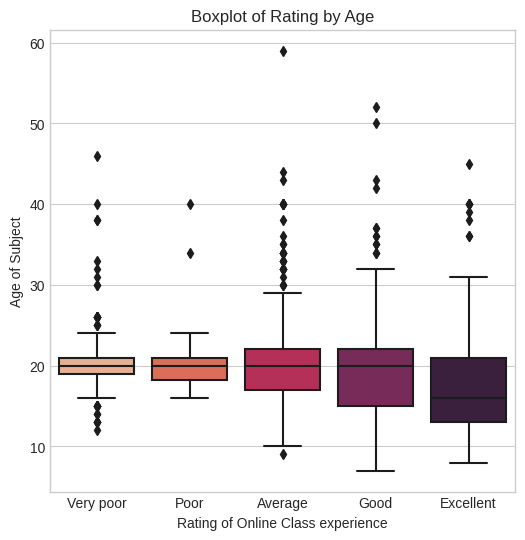

In [79]:
plt.figure(figsize=(6, 6))
fig4 = sns.boxplot(x="Rating of Online Class experience", y="Age of Subject", data=df_2, 
                   order = ['Very poor', 'Poor', 'Average', 'Good', 'Excellent'], 
                   palette='rocket_r')
fig4.set_title("Boxplot of Rating by Age")

📌 Points to know:
    
- The distribution skews to the left, implying the younger students are the primary users for the online class.
- Age 16 to 25 is the most prominent group and contributes almost evenly to each rating category.

#### <span style='color:#FFA07A'> 3.2.3 Preferred Social Media Platform </span>

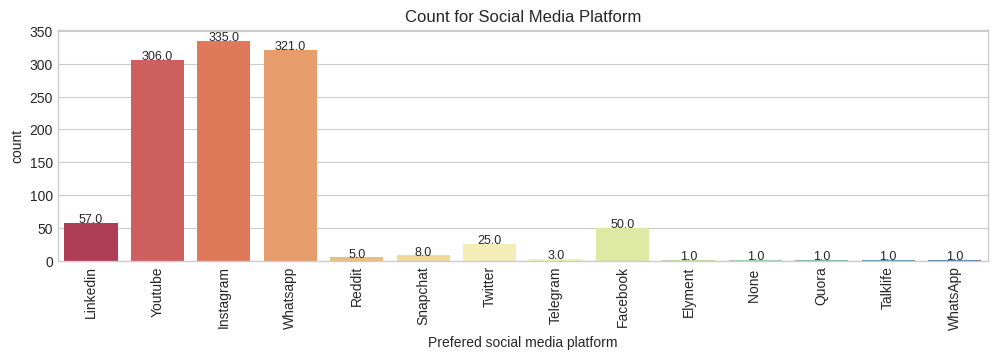

In [80]:
plt.figure(figsize = (12, 3))
fig5 = sns.countplot(x="Prefered social media platform", data=df_2, palette='Spectral')
fig5.set_xticklabels(fig5.get_xticklabels(), rotation=90)
fig5.set_title("Count for Social Media Platform")

#Add a value on top of each column
for rect in fig5.patches:
    fig5.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),
             horizontalalignment='center', fontsize=9)


Text(0.5, 1.0, 'Boxplot of Social Media Platform by Rating')

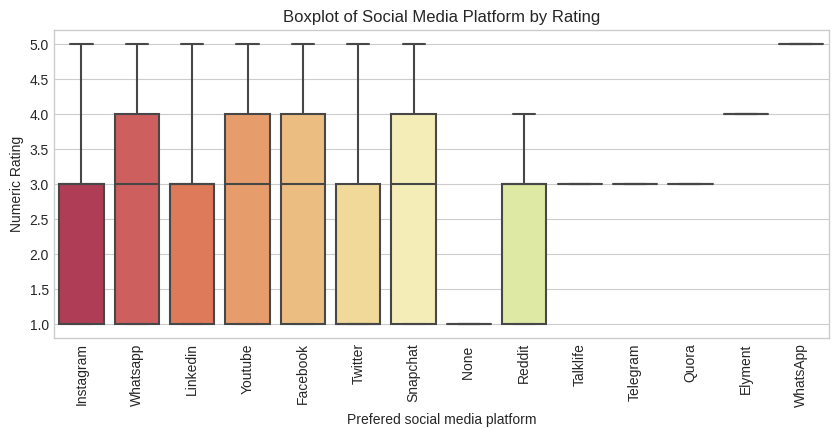

In [81]:
#Arrange order of Numeric Rating
df_pi = df_2.sort_values(by='Numeric Rating', ascending=True)
df_pi['Numeric Rating'] = df_pi['Numeric Rating'].astype(int)

#Create a boxplot
plt.figure(figsize = (10, 4))
fig6 = sns.boxplot(x="Prefered social media platform", y="Numeric Rating", data=df_pi, palette='Spectral')
fig6.set_xticklabels(fig6.get_xticklabels(), rotation=90)
fig6.set_title("Boxplot of Social Media Platform by Rating")


📌 Points to know:
    
- Instagram, Whatsapp, and Youtube are the top 3 preferred social media platforms.
- Whatsapp and Youtube both have a median rating of 3 ("Average") with a maximum rating of 4 ("Good"), while Instagram users rate their highest online class experience to be 3 ("Average").

#### <span style='color:#FFA07A'> 3.2.4 Numeric Personal Indicators </span>

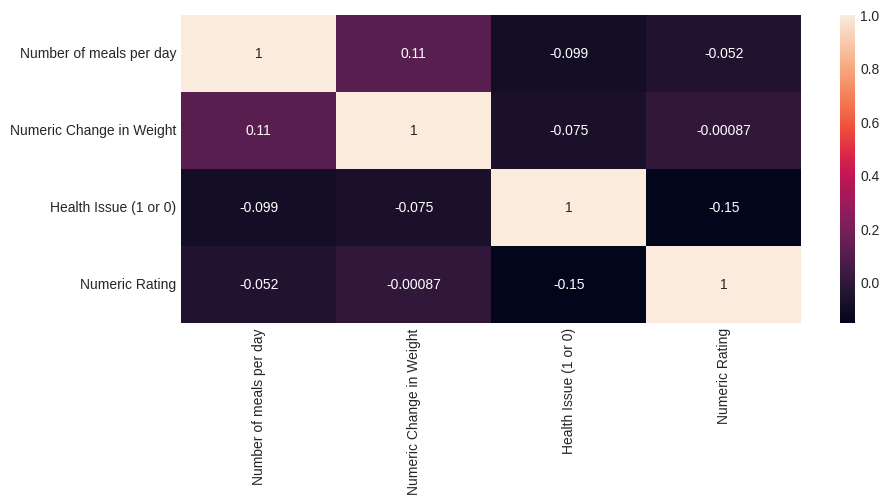

In [82]:
#Subsetting columns
df_pi_num = df_2[['Number of meals per day', 'Numeric Change in Weight', 'Health Issue (1 or 0)', 'Numeric Rating']]
df_pi_num['Numeric Rating'] = df_pi_num['Numeric Rating'].astype(int)
df_pi_num['Numeric Change in Weight'] = df_pi_num['Numeric Change in Weight'].astype(int)

#Create a heatmap showing the correlation
plt.figure(figsize = (10, 4))
sns.heatmap(df_pi_num.corr(), annot=True)
plt.show()

📌 The heatmap shows an extremely weak correlation between numeric personal indicators and the rating of online class experience.

### <span style='color:#FFA07A'> 3.3 Correlation with Time Allocation </span>

#### <span style='color:#FFA07A'> 3.3.1 Distribution for Variables </span>

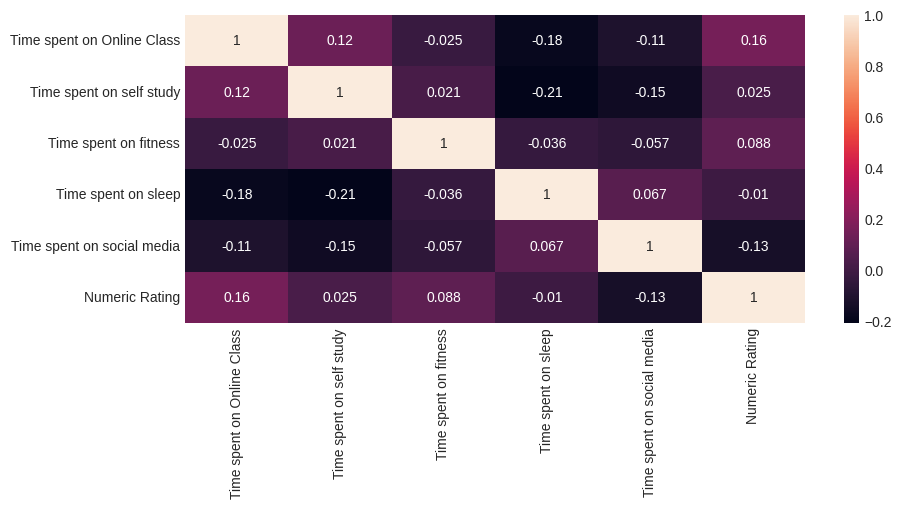

In [83]:
#Subsetting columns
df_TimeMgmt = df_2[['Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness', 
                    'Time spent on sleep','Time spent on social media','Numeric Rating']]
df_TimeMgmt['Numeric Rating'] = df_TimeMgmt['Numeric Rating'].astype(int)

#Create a heatmap
plt.figure(figsize = (10, 4))
sns.heatmap(df_TimeMgmt.corr(), annot=True)
plt.show()

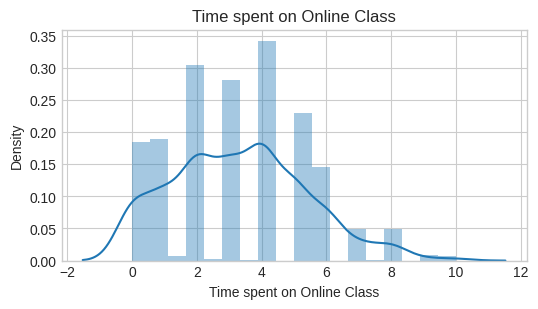

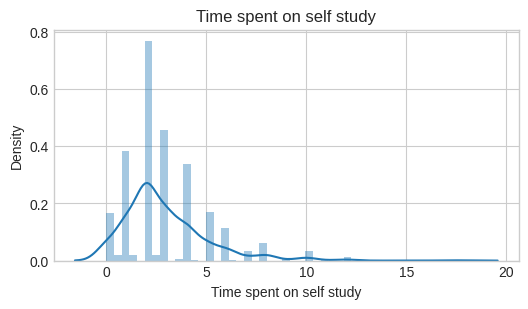

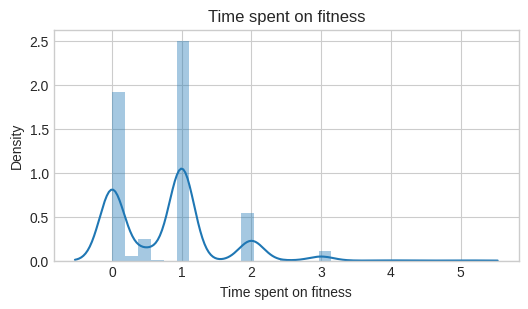

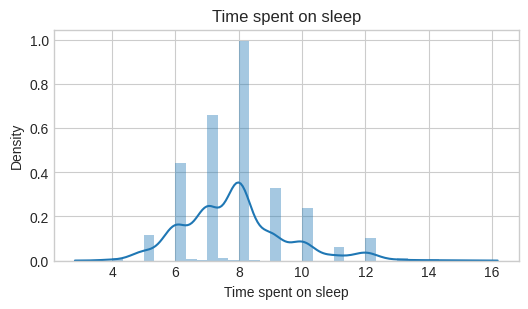

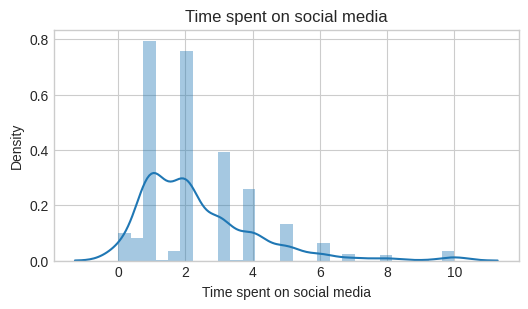

In [84]:
#Create a list of variables
variables = list(df_TimeMgmt.drop(columns='Numeric Rating'))

#Create a distribution plot for each variable
for var in variables:
    plt.figure(figsize = (6, 3))
    sns.distplot(df_TimeMgmt[var])
    plt.title(var)
    plt.show()

📌 Points to know:
- The plots show that there isn't a clear trend for the time spent on each activity. And the variations between them are significant.
- All the plots seem to display a normal distribution except the plot for the time spent on fitness.
- It could result from the unpredictability of human behavior and the size of data collected being small.

# <span style='color:#FFA07A'> 3.3.2 Create a Multivariate Regression Model </span>

In [90]:
df_TimeMgmt.head()

,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Numeric Rating,Prediction
0,2.0,4.0,0.0,7.0,3.0,4,2.289355
1,0.0,0.0,2.0,10.0,3.0,5,2.506470
2,7.0,3.0,0.0,6.0,2.0,1,2.855196
3,3.0,2.0,1.0,6.0,5.0,1,2.362504
4,3.0,3.0,1.0,8.0,3.0,4,2.579433


In [88]:
#Establish independent and dependent variables
independent_variable = df_TimeMgmt.iloc[:, 0:5]
dependent_variable = df_TimeMgmt['Numeric Rating']

independent_variable.head()


,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media
0,2.0,4.0,0.0,7.0,3.0
1,0.0,0.0,2.0,10.0,3.0
2,7.0,3.0,0.0,6.0,2.0
3,3.0,2.0,1.0,6.0,5.0
4,3.0,3.0,1.0,8.0,3.0


In [89]:
dependent_variable.head()

0    4
1    5
2    1
3    1
4    4
Name: Numeric Rating, dtype: int64

In [91]:
#Add a constant to independent variables
independent_variable = sm.add_constant(independent_variable)


In [92]:
#Store and fit the model
regression_model = sm.OLS(dependent_variable, independent_variable).fit()

In [93]:
#Print the regression model summary
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Numeric Rating   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     10.78
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           3.88e-10
Time:                        00:05:04   Log-Likelihood:                -1927.6
No. Observations:                1131   AIC:                             3867.
Df Residuals:                    1125   BIC:                             3897.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          2.2186      0.253      8.755      0.000       1.721       2.716
Time spent on Online Class     0.0990      0.020      5.058      0.000       0.061       0.137
Time spent on self study      -0.0051      0.019     -0.266      0.790      -0.043       0.033
Time spent on fitness          0.1633      0.055      2.964      0.003       0.055       0.271
Time spent on sleep            0.0226      0.026      0.880      0.379      -0.028       0.073
Time spent on social media    -0.0884      0.023     -3.834      0.000      -0.134      -0.043
==============================================================================
Omnibus:                      791.363   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.010
Skew:                           0.026   Prob(JB):                     2.81e-15
Kurtosis:                       1.809   Cond. No.                         61.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <span style='color:#FFA07A'> 3.3.3 Validate Predictions </span>

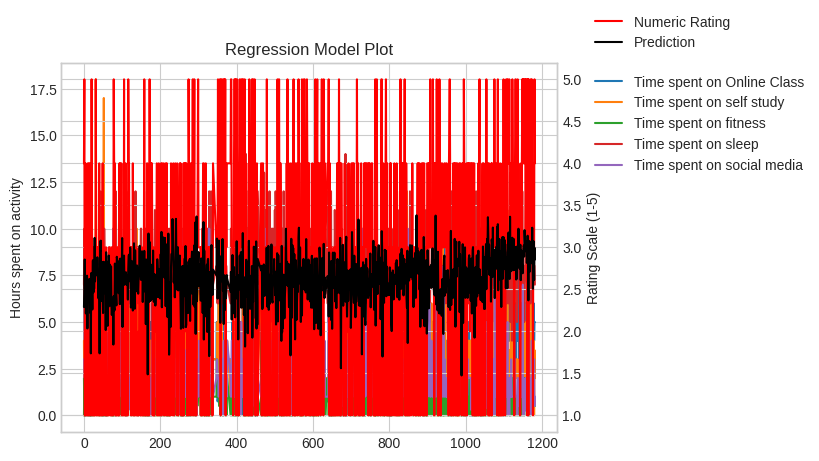

In [86]:
#Create a new column in the dataframe 
df_TimeMgmt['Prediction'] = regression_model.predict(independent_variable) 

#Create a dual_axis plot
ax1 = df_TimeMgmt.iloc[:, 0:5].plot()
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax1.set_ylabel('Hours spent on activity')

ax2 = ax1.twinx()
ax2.plot(df_TimeMgmt['Numeric Rating'], color='red', label='Numeric Rating')
ax2.plot(df_TimeMgmt['Prediction'], color='black', label='Prediction')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='lower left')
ax2.set_ylabel('Rating Scale (1-5)')

plt.rcParams["figure.figsize"] = (12, 4)
plt.title('Regression Model Plot')
plt.show()

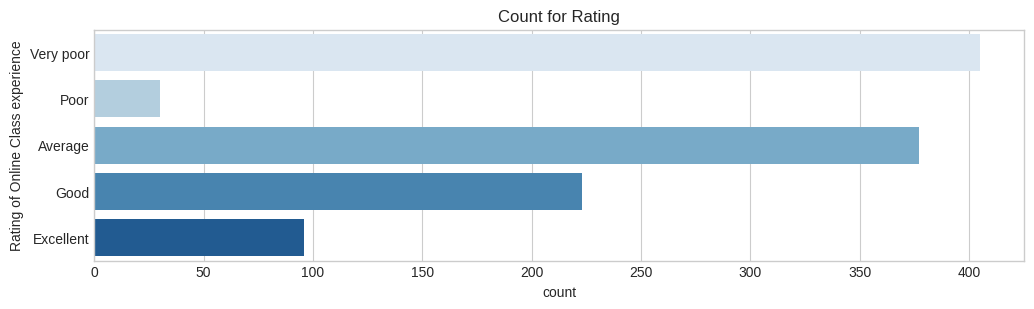

In [87]:
#Create a countplot 
plt.figure(figsize=(12,3))
fig7 = sns.countplot(y = 'Rating of Online Class experience', 
                     order=['Very poor', 'Poor', 'Average', 'Good', 'Excellent'],
                     data = df_2, palette='Blues')
fig7.set_title("Count for Rating")
plt.show()

📌 Points to know:
- For the graph above, I employed the Ordinary Least Squared Regression to create the multivariate regression model. Then I used the dual-axis to plot out the variables and predicted values. 
- As we can see, the majority of predictions fall in the range between 1.5 to 3.5. It matches the count plot where the ratings "Very poor" and "Average" covers the largest proportion. 
- The range of predicted values are smaller than that of the actual values, indicating room for improvements in the regression model.

## Inferences and Conclusion

Here is summary of all the inferences drawn from this analysis, and any conclusions we have drawn by answering various questions:

- **Based on survey we see that most of the students answered the survey fall in the category of 15-25 which is basically the best phase of a student's life.**


- **We Also went on the rating of online classes according to students which resulted not so good because almost 75% students are saying that Online Classes are not Good Enough.**


- **According to the basic analysis close to 50 % students think that they are utilising their time which is quite good.**


- **We did quite a long analysis on Time Spend by students which mainly suggested that the timeline of students is distorted due to Covid-19 Pandemic and they are not able to enjoy their life as they would've if there was not pandemic.**


- **We also found out that students are not being able to give time to studies neither online classes nor self-study.**


- **Now in Social Media prespective we found that Instagram and WhatsApp are the most popular among Students which is quite expected and not that bizzare.**


- **Due to pandemic majority of the students feel more connected to their family/close friends because lockdown has given them opportunity to spend quality time with them which was not that high during normal times.**


- **According to the data Students are missing School and College the most (more than 30%). Morevover about 20% students are missing their families, friends and relatives, this suggests that many students are separated from their families, friends and relatives due to pandemic.**


- **We Also found out that about 45% students reported no change in their weight whereas 37% reported a weight gain and 18% students reported weight loss.**


- **Finally we infer that Music is the best Stress-Busters among students followed by Extra-Activities such as drawing, writing, sketching etc. and then Internet Surfing is third on list for entertainment sources, also Online Gaming have also gained popularity among students for beating stress.**


## Prevention of COVID-19 and Preparing for Future Pandemics

### Prevention of COVID-19:

1. **Vaccination**: Encourage students to get vaccinated against COVID-19 and any future pandemic-causing viruses. Widespread vaccination is one of the most effective ways to prevent the spread of the disease.

2. **Hygiene and Sanitation**:
   - Regular handwashing with soap for at least 20 seconds.
   - Use hand sanitizers when soap and water are not available.
   - Avoid touching the face, especially eyes, nose, and mouth.
   - Maintain proper respiratory hygiene by covering the mouth and nose with a tissue or elbow when coughing or sneezing.

3. **Social Distancing**:
   - Promote social distancing to reduce close contact with infected individuals.
   - Encourage the use of face masks, especially in crowded or indoor settings.

4. **Remote Learning Solutions**:
   - Invest in and prepare for remote learning systems to ensure that education can continue even during lockdowns or school closures.

5. **Mental Health Support**:
   - Provide access to mental health resources and counseling services to help students cope with the stress and anxiety caused by pandemics.

### Preparing for Future Pandemics:

1. **Early Detection and Surveillance**:
   - Develop and enhance systems for early detection of infectious diseases through regular monitoring of health data and international cooperation.

2. **Global Collaboration**:
   - Foster international collaboration to share information, research, and resources for rapid response to global health crises.

3. **Emergency Preparedness Plans**:
   - Create and regularly update comprehensive pandemic preparedness plans at the national, regional, and institutional levels.

4. **Healthcare Infrastructure**:
   - Invest in healthcare infrastructure, including hospital beds, ventilators, and personal protective equipment, to handle surges in cases.

5. **Education and Awareness**:
   - Educate the public on the importance of vaccination, hygiene, and social distancing.
   - Develop public awareness campaigns on pandemic preparedness.

6. **Telemedicine**:
   - Enhance telemedicine capabilities to provide medical advice and consultation remotely.

7. **Research and Development**:
   - Allocate resources for research into antiviral drugs, vaccines, and diagnostics to ensure a rapid response to emerging pandemics.

## Pandemic Response Process:

1. **Early Warning System**:
   - Establish an early warning system to detect potential outbreaks.
   - Collaborate with international health organizations and share information.

2. **Emergency Declaration**:
   - When a potential pandemic is identified, declare a public health emergency to allocate resources and take necessary actions.

3. **Public Health Measures**:
   - Implement public health measures such as social distancing, travel restrictions, and quarantine when necessary.

4. **Medical Response**:
   - Ensure that hospitals and healthcare facilities are prepared to handle a surge in cases.
   - Coordinate with pharmaceutical companies for vaccine and treatment development.

5. **Communication**:
   - Maintain transparent and regular communication with the public, providing updates and guidance.

6. **Support Systems**:
   - Provide support for vulnerable populations, including students, through access to education, mental health services, and financial assistance.

7. **Review and Adapt**:
   - Continuously review the response, learn from experiences, and adapt preparedness plans for future pandemics.

Preventing and preparing for pandemics requires a multi-pronged approach that involves healthcare, education, and collaboration at local, national, and international levels. Being proactive in these areas can help mitigate the impact of future pandemics on students and society as a whole.


8. **Testing and Contact Tracing**:
   - Implement widespread testing and contact tracing to identify and isolate cases promptly.
   - Use technology for efficient contact tracing while respecting privacy.

9. **Supply Chain Management**:
   - Establish resilient supply chains for medical equipment, medicines, and essential goods to avoid shortages during pandemics.

10. **Remote Work and Learning**:
    - Develop and promote remote work and learning solutions to ensure continuity in employment and education while minimizing physical presence.

11. **Travel Guidelines**:
    - Set clear travel guidelines, including restrictions and quarantine protocols, for both domestic and international travel.

12. **Resource Allocation**:
    - Allocate resources efficiently, including medical supplies, healthcare personnel, and funding, based on the severity of the pandemic.

13. **Ethical Considerations**:
    - Develop guidelines and ethical considerations for decision-making during pandemics, especially when resource allocation becomes challenging.

14. **Mental Health Support**:
    - Bolster mental health services to address the psychological impacts of pandemics on individuals and communities.

15. **Community Engagement**:
    - Engage communities in pandemic response efforts, encouraging individuals to take responsibility for their health and the health of their communities.

16. **Public-Private Partnerships**:
    - Foster collaborations between government, private sector, and non-governmental organizations to pool resources and expertise.

17. **Global Solidarity**:
    - Advocate for global solidarity and equity in vaccine distribution to ensure that all nations, especially low-income countries, have access to vaccines and treatments.

18. **Post-Pandemic Recovery**:
    - Develop strategies for post-pandemic recovery, including economic, educational, and healthcare recovery plans.

19. **Research and Innovation**:
    - Invest in research and innovation in the fields of epidemiology, virology, and public health to better understand and combat future pathogens.

20. **Legislation and Policy**:
    - Establish legal and policy frameworks to enable swift decision-making during health emergencies and ensure the protection of civil liberties.

Preparing for pandemics is an ongoing process that involves continual assessment, adaptation, and learning from past experiences. By implementing these measures and establishing a comprehensive response framework, governments, institutions, and individuals can collectively mitigate the impact of pandemics on education, social life, and mental health, as demonstrated by the insights from your analysis of COVID-19's impact on students.


21. **Cross-Disciplinary Collaboration**:
    - Encourage collaboration between various fields of science, including medicine, biology, social sciences, and data analytics. Cross-disciplinary research and collaboration can lead to a more comprehensive understanding of pandemics and their impacts.

22. **Education and Training**:
    - Invest in training programs and educational initiatives to equip healthcare workers, first responders, and the general population with the knowledge and skills needed to respond effectively during a pandemic.

23. **Global Health Governance**:
    - Advocate for and participate in international efforts to strengthen global health governance. Multilateral organizations and agreements are critical in coordinating responses to pandemics that transcend national borders.

24. **Local and Regional Preparedness**:
    - Acknowledge that the response to a pandemic often begins at the local and regional levels. Empower local authorities to take swift and informed action to contain the spread of the disease.

25. **Data and Surveillance**:
    - Invest in advanced data collection, analysis, and modeling capabilities to track the progression of pandemics in real-time. Data-driven decision-making is crucial for an effective response.

26. **Equity and Inclusivity**:
    - Ensure that pandemic responses prioritize the most vulnerable populations, including low-income individuals, the elderly, and those with pre-existing health conditions. Equity in access to healthcare and resources is essential.

27. **Risk Communication**:
    - Develop and implement clear, consistent, and evidence-based risk communication strategies. Effective communication helps build public trust and encourages compliance with health guidelines.

28. **Public Trust**:
    - Maintain public trust by providing accurate information, avoiding misinformation, and promoting transparency in decision-making.

29. **Supply Chain Resilience**:
    - Assess and strengthen the resilience of critical supply chains, such as pharmaceuticals, personal protective equipment (PPE), and medical devices, to prevent shortages during pandemics.

30. **Crisis Simulation and Drills**:
    - Conduct regular pandemic preparedness drills and simulations involving healthcare facilities, first responders, and government agencies to test response strategies.

Remember that the ability to handle pandemics effectively involves a combination of preparedness, a proactive approach, and the flexibility to adapt to evolving situations. It's crucial to learn from past experiences and continue refining pandemic preparedness plans to protect the health, well-being, and futures of students and society as a whole. Additionally, engaging with scientific research, governmental policy, and international cooperation is vital to ensuring a comprehensive response to future pandemics.

# **Thank You!**